In [2]:
!unzip '/content/drive/MyDrive/NM/Garbage1 (1).zip'

Archive:  /content/drive/MyDrive/NM/Garbage1 (1).zip
   creating: Garbage/
   creating: Garbage/test_set/
   creating: Garbage/test_set/test/
   creating: Garbage/test_set/test/cardboard/
  inflating: Garbage/test_set/test/cardboard/cardboard108.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard114.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard115.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard116.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard117.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard119.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard12.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard123.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard125.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard127.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard129.jpg  
  inflating: Garbage/test_set/test/cardboard/cardboard14.jpg  
  inflating: Garbage/test_set/test/cardboard/c

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from keras.layers import Dropout


In [5]:
train_set = "/content/Garbage/train_set/train"
test_set = "/content/Garbage/test_set/test"

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)



In [7]:
batch_size = 128
train_transform = train_datagen.flow_from_directory(train_set,
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')



Found 2048 images belonging to 6 classes.


In [8]:
test_transform =test_datagen.flow_from_directory(test_set,
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 526 images belonging to 6 classes.


In [9]:
train_class = train_transform.class_indices
print(train_class)


{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [9]:
a= list(train_class.keys())
print(a)

['cardboard', 'compost', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [10]:
train_num = train_transform.samples
test_num = test_transform.samples

In [11]:
base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
model=keras.models.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 6)                 150534    
                                                                 
Total params: 14,865,222
Trainable params: 150,534
Non-trainable params: 14,714,688
_________________________________________________________________


In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_transform,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=test_transform,
                         epochs=1,
                         validation_steps=test_num//batch_size,
                         )

16/16 [==============================] - 1654s 104s/step - loss: 1.0545 - accuracy: 0.6216 - val_loss: 0.9418 - val_accuracy: 0.6484


In [19]:
filepath="/content/drive/MyDrive/NM"
model.save(filepath)

In [20]:
from keras.preprocessing import image
import numpy as np

In [21]:

import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)



In [22]:
from PIL import Image
import numpy as np


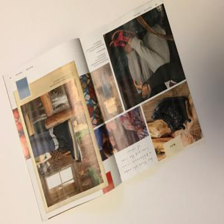

In [32]:
image_path = "/content/Garbage/test_set/test/paper/paper250.jpg"
new_img = Image.open(image_path).resize((224,224))
img = np.array(new_img) / 255.0
img = np.expand_dims(img, axis=0)
new_img

In [33]:
prediction = model.predict(img)

1/1 [==============================] - 1s 567ms/step


In [34]:
a = ['carboard','glass','metal','paper','plastic','trash']

d = prediction.flatten()
j = d.max()
for index, item in enumerate(d):
    if item == j:
        class_name = a[index]


In [35]:
print(class_name)

paper


In [36]:
model.save('garbage1.h5')